In [14]:
import random
import torch
from torch.distributions.multinomial import Multinomial
import matplotlib.pyplot as plt

# A Simple Example: Tossing Coins

In [15]:
num_tosses=100
heads=sum([random.random()>0.5 for _ in range(num_tosses)])
tails=num_tosses-heads
print("heads, tails:",[heads,tails])

heads, tails: [48, 52]


In [16]:
fair_probs=torch.tensor([0.5,0.5])
Multinomial(100,fair_probs).sample()

tensor([50., 50.])

In [17]:
Multinomial(100,fair_probs).sample()/100

tensor([0.3800, 0.6200])

In [18]:
counts=Multinomial(10000,fair_probs).sample()
counts/10000

tensor([0.5036, 0.4964])

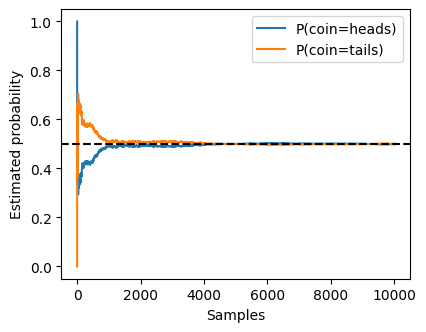

In [19]:
counts=Multinomial(1,fair_probs).sample((10000,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdim=True)
estimates=estimates.numpy()
plt.figure(figsize=(4.5, 3.5))
plt.plot(estimates[:, 0], label=("P(coin=heads)"))
plt.plot(estimates[:, 1], label=("P(coin=tails)"))
plt.axhline(y=0.5, color='black', linestyle='dashed')
plt.gca().set_xlabel('Samples')
plt.gca().set_ylabel('Estimated probability')
plt.legend();